# PCAOB AP filings - Cleanse Firm Filings

-----------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

-----------

## Load data

In [2]:
df = pd.read_csv("data\\FirmFilings.csv", 
                     low_memory=False
                    )      

In [3]:
for col in df.columns:
    print(col)

Form Filing ID
Latest Form AP Filing
Firm ID
Firm Name
Firm Other Name
Firm Country
Amendment Previous Filing
Amendment Firm Identification
Amendment Audit Report
Amendment Other Firms
Amendment Divided Responsibility
Amendment Participants > 5%
Amendment Participants < 5%
Amendment Audit Divided
Amendment Certified Firm
Amendment Certified Firm Info
Audit Report Type
Issuer ID
Issuer Name
Issuer CIK
Issuer Ticker
Issuer CIK None
Audit Fund Series
Audit Report Date
Fiscal Period End Date
Engagement Partner Last Name
Engagement Partner First Name
Engagement Partner Middle Name
Engagement Partner Suffix
Engagement Partner ID
Engagement Partner Other Ids
Firm Issuing Country
Firm Issuing City
Firm Issuing State
Is Multiple Audit Period
Audit Period Information
Dual Dated
Audit Dual Date
Secondary Engagement Partner Last Name
Secondary Engagement Partner First Name
Secondary Engagement Partner Middle Name
Secondary Engagement Partner Suffix
Secondary Engagement Partner ID
Secondary Engagem

-----------

## rename index column

In [4]:
df= df.rename(columns= lambda x: x.lower().replace(" ", "_"))
df= df.rename(columns= lambda x: x.lower().replace("amendment_", "amd_"))
df= df.rename(columns= lambda x: x.lower().replace("secondary_", "sec_"))
df= df.rename(columns= {"form_filing_id": "filing_id",
                               "firm_id":  "af_id",
                               "firm_name":"af_name",
                               "firm_country":"af_ctry",
                               "audit_report_type":"c_type",
                               "issuer_cik":"c",
                               "issuer_id":"issuer_id",
                               "issuer_ticker":"t",
                               "audit_report_date":"ar_date",
                               "fiscal_period_end_date":"fy_end",
                               "engagement_partner_last_name":"ap_lname",
                               "engagement_partner_middle_name":"ap_mname",
                               "engagement_partner_first_name":"ap_fname",
                               "engagement_partner_id":"ap_id",
                               "engagement_partner_other_ids":"ap_id_oth",
                               "firm_issuing_city":"af_city",
                               "firm_issuing_state":"af_state",
                               "is_audit_not_divided":"audit_not_divided",
                               "is_audit_divided":"audit_divided",
                               "filing_date":"file_date",
                              })
for col in df.columns:
    print(col)

filing_id
latest_form_ap_filing
af_id
af_name
firm_other_name
af_ctry
amd_previous_filing
amd_firm_identification
amd_audit_report
amd_other_firms
amd_divided_responsibility
amd_participants_>_5%
amd_participants_<_5%
amd_audit_divided
amd_certified_firm
amd_certified_firm_info
c_type
issuer_id
issuer_name
c
t
issuer_cik_none
audit_fund_series
ar_date
fy_end
ap_lname
ap_fname
ap_mname
engagement_partner_suffix
ap_id
ap_id_oth
firm_issuing_country
af_city
af_state
is_multiple_audit_period
audit_period_information
dual_dated
audit_dual_date
sec_engagement_partner_last_name
sec_engagement_partner_first_name
sec_engagement_partner_middle_name
sec_engagement_partner_suffix
sec_engagement_partner_id
sec_engagement_partner_other_ids
audit_not_divided
audit_divided
use_range
audit_not_divided_percent_information
number_of_participants
participant_percentage
participant_range
audit_divided_information
signed_last_name
signed_first_name
signed_date
signed_business_title
signed_capacity
signed_ph

In [5]:
print(df.shape)
df.head(2)

(92098, 62)


,filing_id,latest_form_ap_filing,af_id,af_name,firm_other_name,af_ctry,amd_previous_filing,amd_firm_identification,amd_audit_report,amd_other_firms,amd_divided_responsibility,amd_participants_>_5%,amd_participants_<_5%,amd_audit_divided,amd_certified_firm,amd_certified_firm_info,c_type,issuer_id,issuer_name,c,t,issuer_cik_none,audit_fund_series,ar_date,fy_end,ap_lname,ap_fname,ap_mname,engagement_partner_suffix,ap_id,ap_id_oth,firm_issuing_country,af_city,af_state,is_multiple_audit_period,audit_period_information,dual_dated,audit_dual_date,sec_engagement_partner_last_name,sec_engagement_partner_first_name,sec_engagement_partner_middle_name,sec_engagement_partner_suffix,sec_engagement_partner_id,sec_engagement_partner_other_ids,audit_not_divided,audit_divided,use_range,audit_not_divided_percent_information,number_of_participants,participant_percentage,participant_range,audit_divided_information,signed_last_name,signed_first_name,signed_date,signed_business_title,signed_capacity,signed_phone_number,signed_email_address,original_firm_form_id,amends_firm_form_id,file_date
0,1,1,248,Grant Thornton LLP,NaN,United States,False,False,False,False,False,False,False,False,False,NaN,Investment Company,611338.0,"Invesco Unit Trusts, Municipal Series 1284",1633408.0,NaN,False,NaN,1/31/2017 12:00:00 AM,1/31/2017 12:00:00 AM,Au Yeung,Carney,NaN,NaN,24800018,NaN,United States,New York,New York,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN,NaN,NaN,NaN,Carey,James,2/1/2017 12:00:00 AM,Partner,Partner,13128560200,FormAP@us.gt.com,NaN,NaN,2/1/2017 4:21:09 PM
1,2,1,248,Grant Thornton LLP,NaN,United States,False,False,False,False,False,False,False,False,False,NaN,Investment Company,649306.0,"Invesco Unit Trusts, Series 1733",1676020.0,NaN,False,NaN,1/31/2017 12:00:00 AM,1/31/2017 12:00:00 AM,Au Yeung,Carney,NaN,NaN,24800018,NaN,United States,New York,New York,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN,NaN,NaN,NaN,Carey,James,2/1/2017 12:00:00 AM,Partner,Partner,13128560200,FormAP@us.gt.com,NaN,NaN,2/1/2017 4:21:09 PM


--------

## keep necessary columns

In [6]:
df=df[['c', 'issuer_id', 't', 'fy_end' ,
               'af_id', 'af_name', 'af_ctry', 'c_type', 'af_city', 'af_state']]
df.head(2)

,c,issuer_id,t,fy_end,af_id,af_name,af_ctry,c_type,af_city,af_state
0,1633408.0,611338.0,NaN,1/31/2017 12:00:00 AM,248,Grant Thornton LLP,United States,Investment Company,New York,New York
1,1676020.0,649306.0,NaN,1/31/2017 12:00:00 AM,248,Grant Thornton LLP,United States,Investment Company,New York,New York


--------

## Generate variables

In [7]:
# float varibles to integer variables
df = df.astype({
    'issuer_id': 'Int64',
    'c':         'Int64'
    })

# change data type for dates variables
df['fy_end']= pd.to_datetime(df['fy_end'])
df.head(2)

,c,issuer_id,t,fy_end,af_id,af_name,af_ctry,c_type,af_city,af_state
0,1633408,611338,NaN,2017-01-31,248,Grant Thornton LLP,United States,Investment Company,New York,New York
1,1676020,649306,NaN,2017-01-31,248,Grant Thornton LLP,United States,Investment Company,New York,New York


In [8]:
df['cyear']= pd.DatetimeIndex(df['fy_end']).year
df['cmonth']=pd.DatetimeIndex(df['fy_end']).month

df.loc[df['cmonth']>=6, 'fy']= df['cyear']
df.loc[df['cmonth']<6, 'fy']= df['cyear']-1
df.fy= df.fy.astype(int)
df.head(2)

,c,issuer_id,t,fy_end,af_id,af_name,af_ctry,c_type,af_city,af_state,cyear,cmonth,fy
0,1633408,611338,NaN,2017-01-31,248,Grant Thornton LLP,United States,Investment Company,New York,New York,2017,1,2016
1,1676020,649306,NaN,2017-01-31,248,Grant Thornton LLP,United States,Investment Company,New York,New York,2017,1,2016


In [9]:
big4_list= [34, 42, 185, 238]
second_tier_list= [243, 248]
big6_list= big4_list + second_tier_list

In [10]:
df.loc[df['af_id'].isin(big4_list), 'aud_group']='big4'
df.loc[df['af_id'].isin(second_tier_list), 'aud_group']='second-tier'
df.loc[df['aud_group'].isnull(), 'aud_group']='others'

In [11]:
df['big4']= (df['af_id'].isin(big4_list)).astype(int)
df['big6']= (df['af_id'].isin(big6_list)).astype(int)
df.head(2)

,c,issuer_id,t,fy_end,af_id,af_name,af_ctry,c_type,af_city,af_state,cyear,cmonth,fy,aud_group,big4,big6
0,1633408,611338,NaN,2017-01-31,248,Grant Thornton LLP,United States,Investment Company,New York,New York,2017,1,2016,second-tier,0,1
1,1676020,649306,NaN,2017-01-31,248,Grant Thornton LLP,United States,Investment Company,New York,New York,2017,1,2016,second-tier,0,1


In [12]:
dict_to_replace_in_af_name= {'Ernst & Young LLP': 'EY',
                             'Deloitte &  Touche LLP': 'Deloitte',
                            'KPMG LLP':'KPMG',
                            'PricewaterhouseCoopers LLP':'PwC',
                            'Grant Thornton LLP':'GT',
                            'BDO USA, LLP':'BDO'
                            }
df['af_name']= df['af_name'].replace(dict_to_replace_in_af_name)

In [13]:
print(df.shape)
df.head(2)

(92098, 16)


,c,issuer_id,t,fy_end,af_id,af_name,af_ctry,c_type,af_city,af_state,cyear,cmonth,fy,aud_group,big4,big6
0,1633408,611338,NaN,2017-01-31,248,GT,United States,Investment Company,New York,New York,2017,1,2016,second-tier,0,1
1,1676020,649306,NaN,2017-01-31,248,GT,United States,Investment Company,New York,New York,2017,1,2016,second-tier,0,1


-------------

## Sample selection - drop obs that are not likely useful

In [14]:
print(df.shape)
df.head(2)

(92098, 16)


,c,issuer_id,t,fy_end,af_id,af_name,af_ctry,c_type,af_city,af_state,cyear,cmonth,fy,aud_group,big4,big6
0,1633408,611338,NaN,2017-01-31,248,GT,United States,Investment Company,New York,New York,2017,1,2016,second-tier,0,1
1,1676020,649306,NaN,2017-01-31,248,GT,United States,Investment Company,New York,New York,2017,1,2016,second-tier,0,1


In [15]:
# define conditions to drop obs
missing_cik=          (df.c.isna())
BP_or_IV=             (df['c_type']!="Issuer, other than Employee Benefit Plan or Investment Company")
earlier_than_2016=    (df['fy']<2016)
auditor_loc_non_us=   (df.af_ctry!='United States')

# default value
df['sample_status']= 'Selected'

# restrict sample
df.loc[missing_cik, 'sample_status']=        '1. missing_cik'
df.loc[BP_or_IV, 'sample_status']=           '2. BP_or_IV'
df.loc[earlier_than_2016, 'sample_status']=  '3. earlier_than_2016'
df.loc[auditor_loc_non_us, 'sample_status']= '4.auditor_loc_non_us'
df.head(2)

,c,issuer_id,t,fy_end,af_id,af_name,af_ctry,c_type,af_city,af_state,cyear,cmonth,fy,aud_group,big4,big6,sample_status
0,1633408,611338,NaN,2017-01-31,248,GT,United States,Investment Company,New York,New York,2017,1,2016,second-tier,0,1,2. BP_or_IV
1,1676020,649306,NaN,2017-01-31,248,GT,United States,Investment Company,New York,New York,2017,1,2016,second-tier,0,1,2. BP_or_IV


In [16]:
sample_selection= df.sample_status.value_counts().sort_index().to_frame().T
sample_selection

,1. missing_cik,2. BP_or_IV,3. earlier_than_2016,4.auditor_loc_non_us,Selected
sample_status,263,38806,231,7894,44904


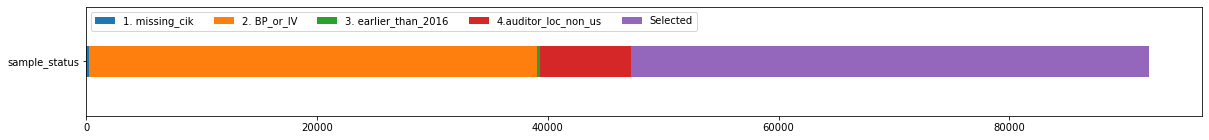

N (selected obs): 44904


In [17]:
sample_selection.plot(kind='barh', stacked= True, figsize= (20,2),width=0.2)
plt.legend(loc="upper left", ncol = 10)
plt.show()
print(f"N (selected obs): {sample_selection.loc['sample_status','Selected']}")

In [18]:
df= df[df.sample_status=='Selected'].drop(columns='sample_status')
print(df.shape)
df.head()

(44904, 16)


,c,issuer_id,t,fy_end,af_id,af_name,af_ctry,c_type,af_city,af_state,cyear,cmonth,fy,aud_group,big4,big6
10,1035443,84871,ARE; ARE.PB; ARE.PC; ARE.PD; ARE.PE,2016-12-31,42,EY,United States,"Issuer, other than Employee Benefit Plan or In...",Los Angeles,California,2016,12,2016,big4,1,1
17,755001,21802,UTL,2016-12-31,34,Deloitte,United States,"Issuer, other than Employee Benefit Plan or In...",Boston,Massachusetts,2016,12,2016,big4,1,1
19,1166691,161860,CMCSA; CMCSK; 4838B; CCZ,2016-12-31,34,Deloitte,United States,"Issuer, other than Employee Benefit Plan or In...",Philadelphia,Pennsylvania,2016,12,2016,big4,1,1
20,30554,2886,DD.2; CTA.PA; CTA.PB,2016-12-31,238,PwC,United States,"Issuer, other than Employee Benefit Plan or In...",Philadelphia,Pennsylvania,2016,12,2016,big4,1,1
21,875045,42829,BIIB,2016-12-31,238,PwC,United States,"Issuer, other than Employee Benefit Plan or In...",Boston,Massachusetts,2016,12,2016,big4,1,1


---------

## Data inspection

## Figure - by years

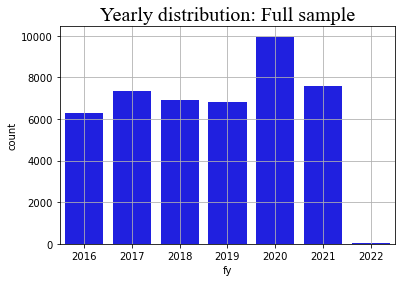

In [19]:
sns.countplot(data= df, x='fy', color='b')
plt.grid()
plt.title("Yearly distribution: Full sample", font='Times New Roman', fontsize=20)
plt.show()

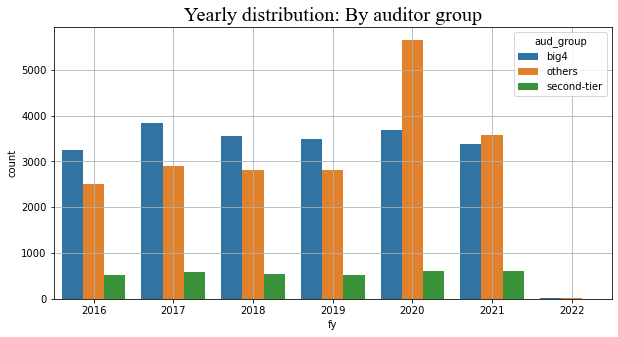

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data= df, x='fy', hue='aud_group')
plt.title("Yearly distribution: By auditor group", font='Times New Roman', fontsize=20)
plt.grid()
plt.show()

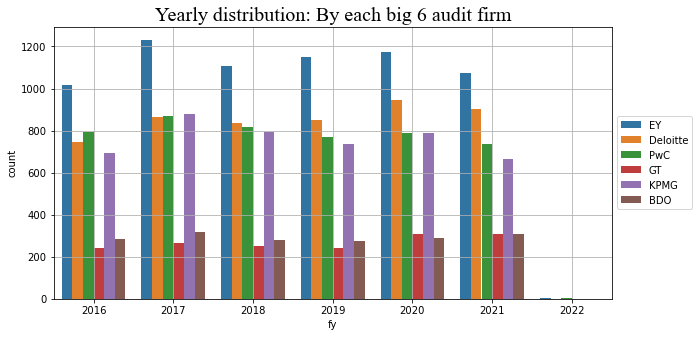

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(data= df[df.big6==1], x='fy', hue='af_name')
plt.title("Yearly distribution: By each big 6 audit firm", font='Times New Roman', fontsize=20)
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [22]:
df.head(2)

,c,issuer_id,t,fy_end,af_id,af_name,af_ctry,c_type,af_city,af_state,cyear,cmonth,fy,aud_group,big4,big6
10,1035443,84871,ARE; ARE.PB; ARE.PC; ARE.PD; ARE.PE,2016-12-31,42,EY,United States,"Issuer, other than Employee Benefit Plan or In...",Los Angeles,California,2016,12,2016,big4,1,1
17,755001,21802,UTL,2016-12-31,34,Deloitte,United States,"Issuer, other than Employee Benefit Plan or In...",Boston,Massachusetts,2016,12,2016,big4,1,1


<hr style="border:2px solid black">

## Load auditcblock from Audit Analytics

In [23]:
import wrds

In [24]:
conn=wrds.Connection()

Enter your WRDS username [yjaey]: yjaeyoon
Enter your password: ···············


WRDS recommends setting up a .pgpass file.


Create .pgpass file now [y/n]?:  y


Created .pgpass file successfully.
Loading library list...
Done


In [25]:
conn.list_tables(library='audit')

['accfiler',
 'auditcblock',
 'auditchange',
 'auditfees',
 'auditfeesr',
 'auditlegal',
 'auditnonreli',
 'auditopin',
 'auditordur',
 'auditors',
 'auditorsinfo',
 'auditsox302',
 'auditsox404',
 'bankrupt',
 'bdfrep',
 'benefit',
 'commlett',
 'commlettconv',
 'commlettthreads',
 'currengbdfrep',
 'currengnpsaud',
 'diroffichange',
 'f01audaff',
 'f01audeve',
 'f01audevetoaud',
 'f01audevetyp',
 'f01audloc',
 'f01secloc',
 'f05audopitogoiconiss',
 'f05goiconiss',
 'f06forapdiv',
 'f06forapfil',
 'f06forapnotdiv',
 'f18meracq',
 'f18meracqfil',
 'f18meracqtratyp',
 'f27aud',
 'f27corpos',
 'f27docdet',
 'f27docdetfil',
 'f27per',
 'f27perfil',
 'f27perpos',
 'f27secloc',
 'f28aud',
 'f28foucod',
 'f28ntecod',
 'f28ntecomcod',
 'f28subclacod',
 'f29aud',
 'f29corpos',
 'f29docdet',
 'f29docdetfil',
 'f29per',
 'f29perfil',
 'f29perpos',
 'f29secloc',
 'f30aud',
 'f30foucod',
 'f30ntecod',
 'f30ntecomcod',
 'f30subclacod',
 'f34audopitogoiconiss',
 'f34forapdiv',
 'f34forapfil',
 'f34f

In [26]:
auditcblock_vars= conn.describe_table(library='audit', table='auditcblock')['name']
print(len(auditcblock_vars), '\n')
for var in auditcblock_vars:
    print(var)

Approximately 363358 rows in audit.auditcblock.
255 

bus_addr
mail_addr
company_fkey
parent_co_fkey
parent_co_name
ult_parent_co_fkey
ult_parent_co_name
name
short_name
former_name1
name_change_date1_str
former_name2
name_change_date2_str
former_name3
name_change_date3_str
sic_code_fkey
sic_code_descrip
naics_code_fkey
naics_code_descrip
loc_state
loc_state_name
loc_state_region
loc_state_country
inc_state
inc_state_name
inc_state_region
inc_state_country
fiscal_ye
bus_street1
bus_street2
bus_city
bus_state
bus_state_name
bus_state_region
bus_state_country
bus_zip
bus_phone
mail_street1
mail_street2
mail_city
mail_state
mail_state_name
mail_state_region
mail_state_country
mail_zip
is_in_sp500
is_in_nasdaq_composite
is_in_djia30
is_in_russell_2000
best_edgar_ticker
market
irs_number
curr_aud_fkey
curr_aud_name
curr_aud_aff_fkey
curr_aud_aff_nam
curr_aud_aff_hom_off_sta
curr_aud_aff_hom_off_sta_nam
curr_aud_aff_hom_off_sta_reg
curr_aud_aff_is_pca_reg
curr_aud_aff_pca_reg_num
curr_audsnc

In [27]:
vars_to_keep= ['company_fkey', 'name', 'short_name', 'sic_code_fkey', 'sic_code_descrip']

auditcblock= conn.get_table(library= 'audit', table='auditcblock',
                       columns= vars_to_keep)
print(auditcblock.shape)
auditcblock.head()

(363358, 5)


,company_fkey,name,short_name,sic_code_fkey,sic_code_descrip
0,0000000020,K TRON INTERNATIONAL INC,K TRON INTL,3823,"Industrial Instruments for Measurement, Displa..."
1,0000001750,AAR CORP,AAR,3720,Aircraft & Parts
2,0000001800,ABBOTT LABORATORIES,ABBOTT LABS,2834,Pharmaceutical Preparations
3,0000001830,ABCO INC,ABCO,9995,Non-Operating Establishments
4,0000001841,ABEL/NOSER CORP.,ABEL,None,None


In [28]:
auditcblock.rename(columns={'company_fkey':'c',
                           'sic_code_fkey':'sic',
                           'sic_code_descrip':'sicd'},
                  inplace= True)
auditcblock= auditcblock[auditcblock.sic.notnull()]
auditcblock.shape
auditcblock['c']= auditcblock['c'].astype(int)
auditcblock['sic']= auditcblock['sic'].astype(int)

<hr style="border:2px solid black">

## Merge: AP filings + auditcblock from WRDS

In [29]:
print(df.shape)
df.head(2)

(44904, 16)


,c,issuer_id,t,fy_end,af_id,af_name,af_ctry,c_type,af_city,af_state,cyear,cmonth,fy,aud_group,big4,big6
10,1035443,84871,ARE; ARE.PB; ARE.PC; ARE.PD; ARE.PE,2016-12-31,42,EY,United States,"Issuer, other than Employee Benefit Plan or In...",Los Angeles,California,2016,12,2016,big4,1,1
17,755001,21802,UTL,2016-12-31,34,Deloitte,United States,"Issuer, other than Employee Benefit Plan or In...",Boston,Massachusetts,2016,12,2016,big4,1,1


In [30]:
print(auditcblock.shape)
auditcblock.head(2)

(47281, 5)


,c,name,short_name,sic,sicd
0,20,K TRON INTERNATIONAL INC,K TRON INTL,3823,"Industrial Instruments for Measurement, Displa..."
1,1750,AAR CORP,AAR,3720,Aircraft & Parts


In [31]:
df= df.merge(auditcblock, how='left', on='c')
df=df[df.sic.notnull()]

----

## Work with SIC

In [32]:
df['sic']= df['sic'].astype(int)
df['sic1']= df['sic']//1000
df['sic2']= df['sic']//100
print(df.shape)
df.head(2)

(43695, 22)


,c,issuer_id,t,fy_end,af_id,af_name,af_ctry,c_type,af_city,af_state,cyear,cmonth,fy,aud_group,big4,big6,name,short_name,sic,sicd,sic1,sic2
0,1035443,84871,ARE; ARE.PB; ARE.PC; ARE.PD; ARE.PE,2016-12-31,42,EY,United States,"Issuer, other than Employee Benefit Plan or In...",Los Angeles,California,2016,12,2016,big4,1,1,"ALEXANDRIA REAL ESTATE EQUITIES, INC.",ALEXANDRIA REAL ESTATE EQUITIES,6798,Real Estate Investment Trusts,6,67
1,755001,21802,UTL,2016-12-31,34,Deloitte,United States,"Issuer, other than Employee Benefit Plan or In...",Boston,Massachusetts,2016,12,2016,big4,1,1,UNITIL CORP,UNITIL,4931,Electric and Other Services Combined,4,49


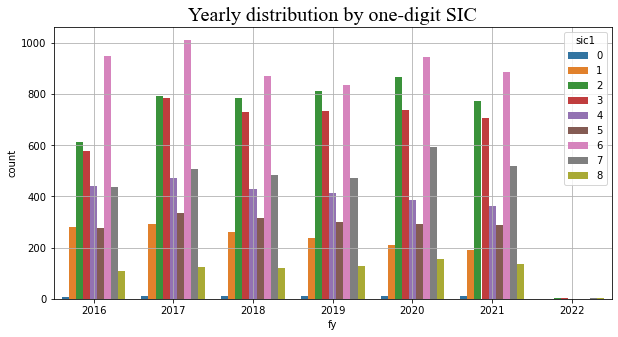

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(data= df[df.big6==1], x='fy', hue= 'sic1')
plt.title('Yearly distribution by one-digit SIC', font='Times New Roman', fontsize= 20)
plt.grid()
plt.show()

<hr style="border:2px solid black">

In [35]:
# define conditions to drop obs
fin_ind=    (df['sic1']==6)

# default value
df['sample_status']= 'Selected'

# restrict sample
df.loc[fin_ind, 'sample_status']=        '1. finance industry'
df.head(2)

,c,issuer_id,t,fy_end,af_id,af_name,af_ctry,c_type,af_city,af_state,cyear,cmonth,fy,aud_group,big4,big6,name,short_name,sic,sicd,sic1,sic2,sample_status
0,1035443,84871,ARE; ARE.PB; ARE.PC; ARE.PD; ARE.PE,2016-12-31,42,EY,United States,"Issuer, other than Employee Benefit Plan or In...",Los Angeles,California,2016,12,2016,big4,1,1,"ALEXANDRIA REAL ESTATE EQUITIES, INC.",ALEXANDRIA REAL ESTATE EQUITIES,6798,Real Estate Investment Trusts,6,67,1. finance industry
1,755001,21802,UTL,2016-12-31,34,Deloitte,United States,"Issuer, other than Employee Benefit Plan or In...",Boston,Massachusetts,2016,12,2016,big4,1,1,UNITIL CORP,UNITIL,4931,Electric and Other Services Combined,4,49,Selected


-----------
## Sample selection: Drop financial firms

In [36]:
sample_selection= df.sample_status.value_counts().sort_index().to_frame().T
sample_selection

,1. finance industry,Selected
sample_status,12752,30943


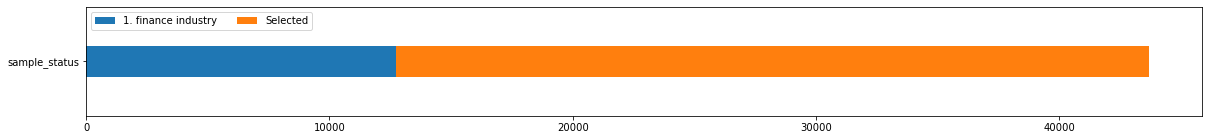

N (selected obs): 30943


In [37]:
sample_selection.plot(kind='barh', stacked= True, figsize= (20,2),width=0.2)
plt.legend(loc="upper left", ncol = 10)
plt.show()
print(f"N (selected obs): {sample_selection.loc['sample_status','Selected']}")

In [38]:
df=df[df.sample_status=='Selected'].drop(columns= 'sample_status')

----------------------

## Visualization after limiting sample to non-financial firms

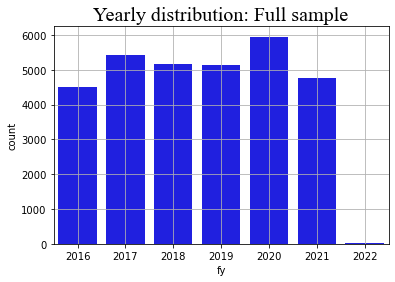

In [39]:
sns.countplot(data= df, x='fy', color='b')
plt.grid()
plt.title("Yearly distribution: Full sample", font='Times New Roman', fontsize=20)
plt.show()

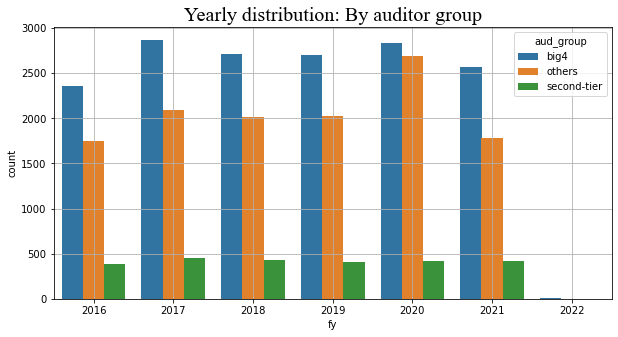

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(data= df, x='fy', hue='aud_group')
plt.title("Yearly distribution: By auditor group", font='Times New Roman', fontsize=20)
plt.grid()
plt.show()

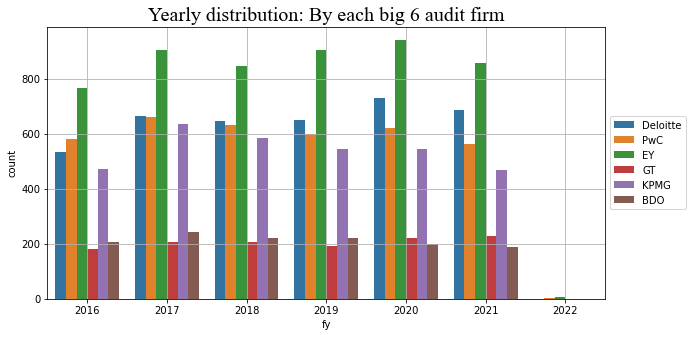

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(data= df[df.big6==1], x='fy', hue='af_name')
plt.title("Yearly distribution: By each big 6 audit firm", font='Times New Roman', fontsize=20)
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [42]:
df.head(2)

,c,issuer_id,t,fy_end,af_id,af_name,af_ctry,c_type,af_city,af_state,cyear,cmonth,fy,aud_group,big4,big6,name,short_name,sic,sicd,sic1,sic2
1,755001,21802,UTL,2016-12-31,34,Deloitte,United States,"Issuer, other than Employee Benefit Plan or In...",Boston,Massachusetts,2016,12,2016,big4,1,1,UNITIL CORP,UNITIL,4931,Electric and Other Services Combined,4,49
2,1166691,161860,CMCSA; CMCSK; 4838B; CCZ,2016-12-31,34,Deloitte,United States,"Issuer, other than Employee Benefit Plan or In...",Philadelphia,Pennsylvania,2016,12,2016,big4,1,1,COMCAST CORP,COMCAST,4841,Cable and Other Pay Television Services,4,48


In [43]:
df['af_loc']= df['af_city'] + ', ' + df['af_state']

---------

## State and City info

In [72]:
print(f"N of unique pairs (state-city): {df.af_loc.nunique()}.")

N of unique pairs (state-city): 409.


In [46]:
df[['af_state', 'af_city']].nunique()

af_state     49
af_city     380
dtype: int64

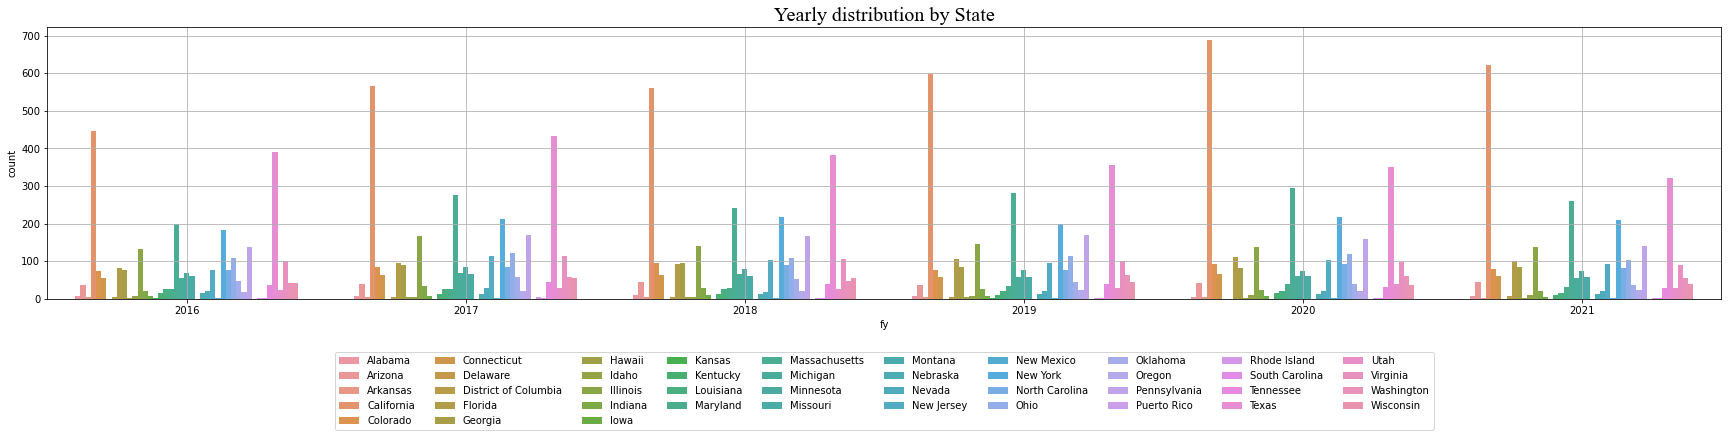

In [71]:
df_to_vis= df[(df.big6==1) &(df.fy<=2021)].sort_values('af_state')

plt.figure(figsize=(30,5))
sns.countplot(data= df_to_vis, x='fy', hue= 'af_state')
plt.title('Yearly distribution by State', font='Times New Roman', fontsize= 20)
plt.grid()
plt.legend(loc='lower center', ncol = 10, bbox_to_anchor=(0.5, -0.5))
plt.show()

In [45]:
df.groupby(['af_state', 'af_city']).size()

af_state              af_city               
Alabama               Birmingham                  60
Arizona               PHOENIX                      1
                      Phoenix                    281
                      Scottsdale                   6
                      Tempe                        1
Arkansas              Fayetteville                 8
                      Little Rock                 14
                      Rogers                      13
California            Alhambra                    14
                      Anaheim                      6
                      BAKERSFIELD                  6
                      BREA                         1
                      Basking Ridge                1
                      Brea                         3
                      Campbell                     9
                      Chatsworth                  12
                      City of Industry             1
                      Costa Mesa                 217
 

-----------
## Sample selection: Drop financial firms

## Save

In [47]:
df.to_csv('data\\apfilings_cleansed.csv')

-------------